In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cashbowman/ai-generated-images-vs-real-images")

print("Path to dataset files:", path)

100%|██████████| 476M/476M [00:05<00:00, 90.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/cashbowman/ai-generated-images-vs-real-images/versions/1


In [ ]:
import shutil
import os

# Source path (where your data currently is)
source_path = "/root/.cache/kagglehub/datasets/cashbowman/ai-generated-images-vs-real-images/versions/1"

# Destination path (where you want to move it)
dest_path = "/content/dataset"  # You can name this whatever you want

# Create destination directory if it doesn't exist
os.makedirs(dest_path, exist_ok=True)

# Move the entire directory
shutil.copytree(source_path, dest_path, dirs_exist_ok=True)  # Use copy instead of move to keep original
# OR if you want to actually move (not copy):
# shutil.move(source_path, dest_path)

print(f"Data moved to {dest_path}")
print("Contents of new location:", os.listdir(dest_path))

Data moved to /content/dataset
Contents of new location: ['RealArt', 'AiArtData']


In [ ]:
!mkdir /content/dataset/real

In [ ]:
!mkdir /content/dataset/ai

In [ ]:
import shutil
import os

# Current nested path
nested_path = "/content/dataset/RealArt/RealArt"
# Target path
target_path = "/content/dataset/real"

# Move all contents from nested directory to parent
for item in os.listdir(nested_path):
    src = os.path.join(nested_path, item)
    dst = os.path.join(target_path, item)
    shutil.move(src, dst)

# Remove the now-empty nested directory
os.rmdir(nested_path)

print("Directory structure fixed!")
print(f"Contents of {target_path}:", os.listdir(target_path))

Directory structure fixed!
Contents of /content/dataset/real: ['Child-face-portraits-Helen-Whittle-1.jpg', 'images83.jpg', 'images15.jpg', 'pexels-mali-maeder-110820-1280x720.png', '2506708-HSC00001-6.jpg', 'beautiful-scenery-136-61dedf99f0878__880.jpg', 'beautiful-scenery-rock-formations-sea-queens-bath-kauai-hawaii-sunset-186645179.jpg', '6170a8ed-8180-448b-8cd1-faaa035fd5c6_570.Jpeg.jpg', 'Cheetah-wildlife-hero.jpg', '1010172.jpg', '2020-03-feature-giraffe_tcm7-269465.png', 'beautiful-scenery-wallpaper_1920x1080_91975.jpg', 'capy1.png', 'peoplegrove-og_image.jpg', '0182.png', 'Crowd-of-Diverse-People_800x528.jpg', 'people-person.jpg', '360_F_606797008_rGPPk6bFWDQydnX7g7w1w9dVVZ4mD22J.jpg', 'scenery.jpg', 'Screenshot-2023-06-12-at-18.36.47.png', '1f6aa65055228e5224e504ba4b0a0de1.png', 'index-celebs-who-ran-for-office-1566504748.jpg', 'self-portrait-of-a-man.jpg', '20200204-Influential-51_camera-press.jpg', '2ibwo5nyey_76768945_200ee080_6772_11ea_99f1_23346ee95a58.jpg', 'fe9d1f1322c45

In [ ]:
import shutil
import os

# Current nested path
nested_path = "/content/dataset/AiArtData/AiArtData"
# Target path
target_path = "/content/dataset/ai"

# Move all contents from nested directory to parent
for item in os.listdir(nested_path):
    src = os.path.join(nested_path, item)
    dst = os.path.join(target_path, item)
    shutil.move(src, dst)

# Remove the now-empty nested directory
os.rmdir(nested_path)

print("Directory structure fixed!")
print(f"Contents of {target_path}:", os.listdir(target_path))

Directory structure fixed!
Contents of /content/dataset/ai: ['2K65J19-2.jpg', 'midjourney20images.jpg', '6324662e5ee3110438933c1b_COBE-Pink-Elephant-Midjourney-Article.jpg', 'zoomout_1.jpg', 'name620-e1680453801646.png', 'notlandscapes.jpg', '221206-lensa-selfies-ai-celebrities-cs-548f22.jpg', 'ai-generated-7787714_1280.jpg', '1IGvTkw48FTa1pO33VbG4eA.png', '64dccffa6728f2a276286964_can-ai-generated-content-rank-on-google.jpg', 'Animals04april2023.jpg', '71f09875-ca8e-40e1-b99e-c70a0d3cc063-large16x9_NorthDakota.jpeg', 'panoramic-abstract-mountain-scenery-in-flat-style-natural-wallpaper-ai-generated-image-photo.jpg', 'barbsotiart_22_DEC_AIART-blog-post-content-photo-5.jpg', 'AI4Animals_Logo.jpg', 'ai-portrait-10.jpg', 'witchy-studio-japan-psychedelic-05.jpg', '230726115314-01-lensa-selfie.jpg', '0EAwg7WIIMhgnSfLf.png', 'how-do-you-make-the-ai-pictures-people-are-posting-on-instagram-1670327982.jpg', 'ting-art-on-a-canvas-with-many-colors-in-art-nouveau-style-1-e1670998298608.jpeg', 'wie

In [ ]:
import os
import shutil
import random
from pathlib import Path

def split_data(source_dir, dest_dir, split=(0.7, 0.15, 0.15), seed=42):
    random.seed(seed)
    classes = ['ai', 'real']

    for cls in classes:
        cls_dir = Path(source_dir) / cls
        images = list(cls_dir.glob('*'))
        random.shuffle(images)

        n_total = len(images)
        n_train = int(split[0] * n_total)
        n_val = int(split[1] * n_total)

        splits = {
            'train': images[:n_train],
            'val': images[n_train:n_train + n_val],
            'test': images[n_train + n_val:]
        }

        for split_name, split_imgs in splits.items():
            dest_path = Path(dest_dir) / split_name / cls
            dest_path.mkdir(parents=True, exist_ok=True)
            for img in split_imgs:
                shutil.copy(img, dest_path / img.name)

split_data('/content/dataset', 'dataset_split')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    'dataset_split/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    'dataset_split/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 680 images belonging to 2 classes.
Found 145 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary output

# Final model
model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,718,913 (90.48 MB)

 Trainable params: 131,201 (512.50 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

# Callbacks
checkpoint = ModelCheckpoint('models/best_model.h5', monitor='val_accuracy',
                             save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint, earlystop]
)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.5316 - loss: 0.7026
Epoch 1: val_accuracy improved from -inf to 0.55172, saving model to models/best_model.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5325 - loss: 0.7024 - val_accuracy: 0.5517 - val_loss: 0.6899
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 966ms/step - accuracy: 0.5331 - loss: 0.7071
Epoch 2: val_accuracy did not improve from 0.55172
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5330 - loss: 0.7072 - val_accuracy: 0.5517 - val_loss: 0.6885
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.5365 - loss: 0.7003
Epoch 3: val_accuracy did not improve from 0.55172
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5369 - loss: 0.7004 - val_accuracy: 0.5517 - val_loss: 0.6896
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 943ms/step - accuracy: 0.5142 - loss: 0.7112
Epoch 4: val_accuracy did not improve from 0.55172
22/22 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5148 - loss: 0.7110 - val_accuracy: 0.5517 - val_loss: 0.6908
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.4741 - loss: 0.7402
Epoch 5: val_accuracy did not improve from 

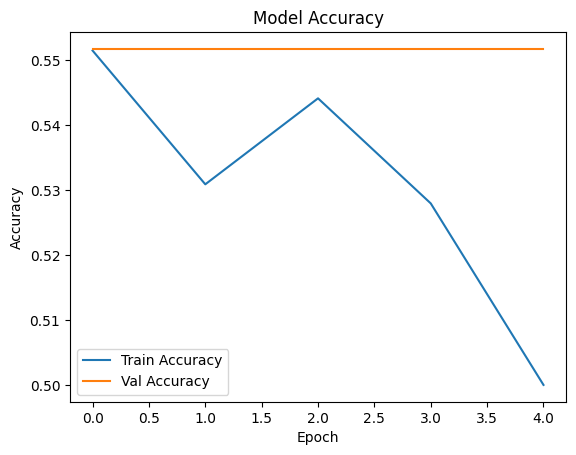

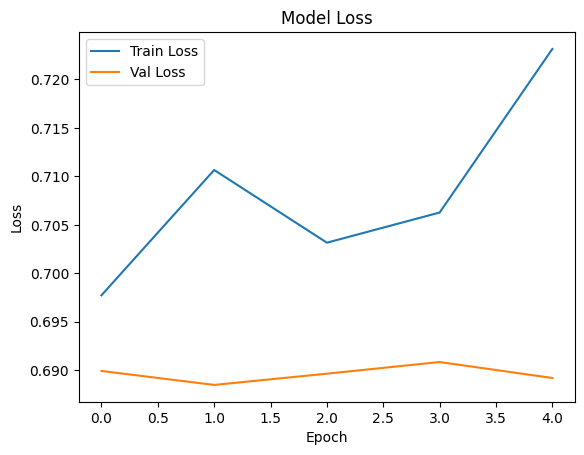

In [ ]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step
              precision    recall  f1-score   support

          ai       0.55      1.00      0.71        80
        real       0.00      0.00      0.00        65

    accuracy                           0.55       145
   macro avg       0.28      0.50      0.36       145
weighted avg       0.30      0.55      0.39       145



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


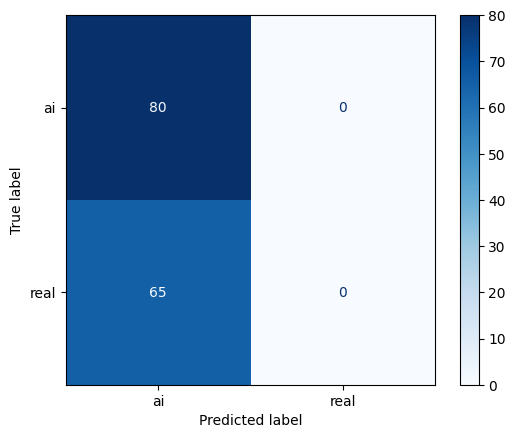

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get predictions
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype("int32")
y_true = test_generator.classes

# Labels
class_names = list(test_generator.class_indices.keys())

# Report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')


In [ ]:
model.save("models/best_model.keras")
